57.174088154047865


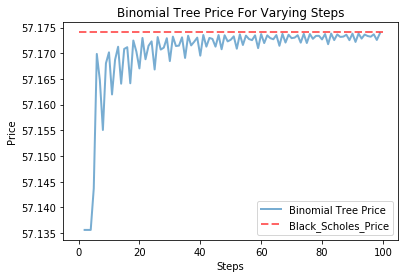

In [59]:
import math
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats
import pandas as pd
def black_scholes_model( S0, r, K,T,sigma):


    """

    S0 = initial stock price

    r = risk free interest rate per annum
    sigma=volatility
    duration=time period for expiry (in days)
    K = strike price
    """
    d1=(math.log(S0/K)+(r+(.5*sigma*sigma))*T)/(sigma*math.sqrt(T))
    d2=d1-sigma*math.sqrt(T)
    N1=(scipy.stats.norm(0, 1).cdf(d1))
    N2=(scipy.stats.norm(0, 1).cdf(d2))

    return (S0*N1-K*math.exp(-r*T)*N2)


print(black_scholes_model( 420, .05848, 370,.333,.0994))
def binomial_call(S, K, T, r, vol, N):
    """
    Implements the binomial option pricing model to price a European call option on a stock
    S - stock price today
    K - strike price of the option
    T - time until expiry of the option
    r - risk-free interest rate
    vol - the volatility of the stock
    N - number of steps in the model
    """
    dt = T/N
    u =  math.exp(vol * math.sqrt(dt))
    d = 1/u
    p = (math.exp(r * dt) - d)/(u - d)
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (2*m - N)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = math.exp(-r * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
    return C[(0,0)]


steps = range(2, 100, 1)
prices = [binomial_call(420, 370, .333, .05848, .0994,step ) for step in steps]

plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[black_scholes_model( 420, .05848, 370,.333,.0994), black_scholes_model( 420, .05848, 370,.333,.0994)], "r--", label="Black_Scholes_Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()






In [60]:
# print(black_scholes_model( 420, .05848, 370,.333,.0994))
# def binomial_call(S, K, T, r, vol, N):
import scipy.stats as si
def newton_vol_call(S, K, T, C, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    fx = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - C
    
    vega = (1 / np.sqrt(2 * np.pi)) * S * np.sqrt(T) * np.exp(-(si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
    tolerance = 0.000001
    x0 = sigma
    xnew  = x0
    xold = x0 - 1
        
    while abs(xnew - xold) > tolerance:
    
        xold = xnew
        xnew = (xnew - fx - C) / vega
        
        return abs(xnew)
print(newton_vol_call(420,370,.333,57.175,0.05848,.0994))

0.9612221634964234
